<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez17_21042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parliamo di visualizzazioni.

**Dal punto di vista scientifico scegliamo di visualizzare i dati per capirli meglio. L'altra motivazione è quella di comunicare i dati al pubblico.**

Ad esempio il Feynman diagram è un esempio che coinvolge sia la divulgazione che la visualizzazione per capire meglio. 

Per quanto riguarda le mappe possiamo usare altri pacchetti oltre a geopandas come: basemap o leaflet.

Per la visualizzazione dei dati bisogna trovare il giusto compromesso tra semplicità e l'ambiguità altrimenti semplificando troppo si possono togliere informazioni importanti. 

Tufte rules: data-ink-ratio. Massimizzare il rapporto tra quantità di dati e inchiostro utilizzato.


Le caratteristiche visive dei parametri di python le controllo da rc.params

In [1]:
import pylab as pl

In [2]:
pl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [3]:
type(pl.rcParams)

matplotlib.RcParams

Posso cambiare le impostazioni di default

In [4]:
pl.rcParams['figure.figsize'] = (10,10)

In [5]:
pl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

Inoltre con la rainbow map, si perdono molti dettagli di sfumature e soprattutto si percepisce il gradiente molto più marcato e alto di quello che effettivamente è. Usando una scala di grigi in bianco e nero tutti qeusti dettagli e sfumature si perceiscono meglio.

In generale comunque, è sempre meglio usare colormap divergenti nel colore: perceptually uniform color map.

Posso usare i circle plot solo nel caso in cui ho una periodicità nei dati o nel caso in cui non ho un ordine nei dati o quando non ho una gerarchia, perchè quando utlizzo scatterplot ad esempio, implicitamente sto dando un inizio e una fine ai dati.

#ESERCIZIO

Riprodurre un H-R diagram (Hertzsprung-Russell diagram)

Fare un plot dell'H-R diagram: essendoci molti dati dobbiamo vedere come rappresentarli al meglio cambiando alpha che è la trasparenza. Oppure utilizzare astroml package per fare un contours and point plot.

https://github.com/fedhere/MLPNS2021/blob/main/viz/scattercontoursInstructions.ipynb 

In [6]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
pylab.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/fbb.mplstyle")

In [8]:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"

In [9]:
df = pd.read_csv(url)

#**NOTA CHE IL TUTTO FUNZIONA ANCHE SENZA TOGLIERE I NaN. PRENDO TUTTI I DATI E LI METTO NELLO SCATTER-PLOT COSÌ COME STANNO**

Ci sono dei NaN e quindi ripulisco i dati

In [10]:
#dfclean = df.dropna(axis=0)
#dfclean.head()

In [11]:
#dfclean.k2_rad

In [12]:
#dfclean['k2_rad']

Aggiungo la colonna luminosity in watt

In [13]:
df['lum_watt'] = (4 * np.pi * (df.k2_rad*const.R_sun)**2 
                              * const.sigma_sb * (df.k2_teff)**4 )

**Se voglio estrarre numpy values da una colonna di un dataframe posso fare:**

In [14]:
#la colonna luminosity_watt è:
df.values[:,3]

array([nan, nan, nan, ..., nan, nan, nan])

In [15]:
#dfclean.dropna(axis=0, how='any', inplace=True)
#dfclean

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


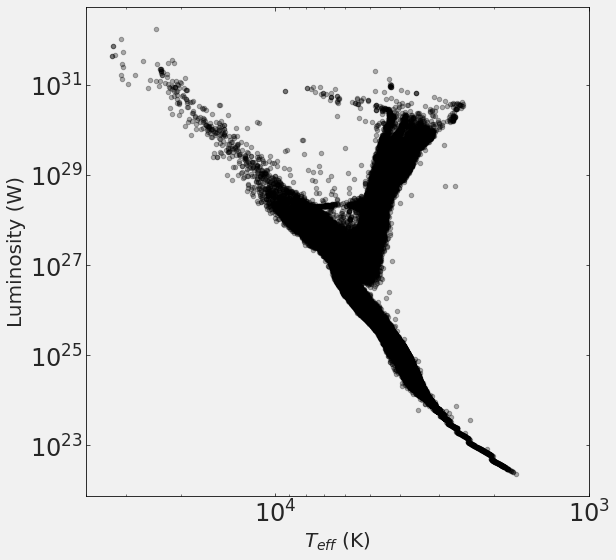

In [16]:
df.plot.scatter(x='k2_teff', y='lum_watt', loglog=True, 
                     color='k', s=20, figsize=(9,9), alpha=0.3)
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');

Non si capisce molto: il problema è che la densitò dei punti è molto diversa tra le parti interne ed esterne della distribuzione dei dati. 

**Percui per prima cosa posso porvare a ridurre la trasprenza inserendo "alpha=0.5" o minore.**

Ma nonostante tutto al centro è sempre molto evidente quanto sono densi e non si capisce niente lo stesso.

##**LA SOLUZIONE POTREBBE ESSERE METTERE INSIEME DUE TECNICHE GRAFICHE CHE SONO I PUNTI ED I CONTORNI**

Ma per fare questo devo eliminare i NaN, perchè astroml non vuole i NaN.

In [17]:
teff_na = df['k2_teff'].dropna()
lum_na = df['lum_watt'].dropna()

#AstroML Plot

In [18]:
!pip install astroML

     |████████████████████████████████| 112kB 4.3MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp37-none-any.whl size=128664 sha256=f031c87dfd2e7c406fe9c8670d82c2567a03f797ebd6c7739e280b94a2444cff
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


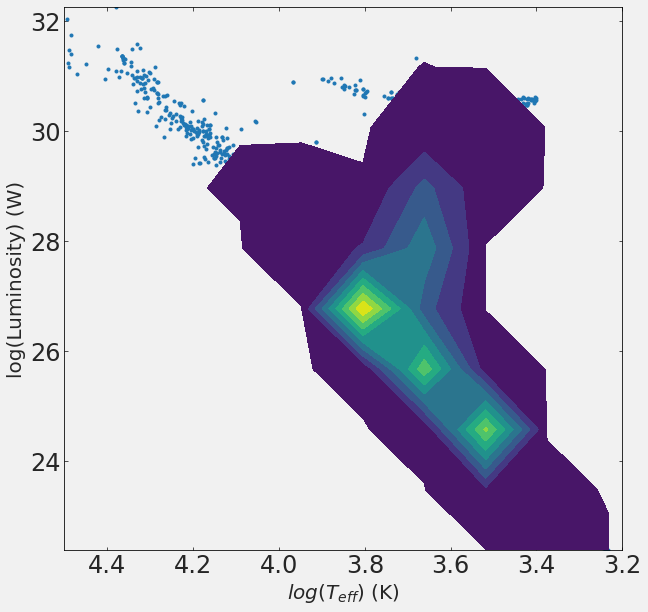

In [19]:
from astroML import plotting
#rememnber that you are making a log-log plot
ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(x=np.log10(teff_na), y =np.log10(lum_na))

plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5, 3.2)
plt.savefig("k2scatter_contour.png")

###**E adesso giohciamo un po' con i parametri per aggiustare il plot**


In [20]:
plotting.scatter_contour?

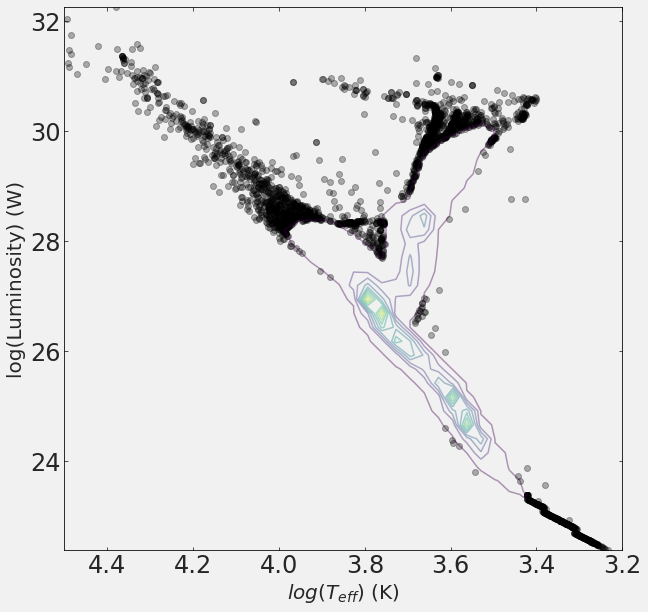

In [23]:
ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(ax=ax, x=np.log10(teff_na), y =np.log10(lum_na),
                         filled_contour=False,
                         histogram2d_args={'bins':(40,40)},
                         plot_args={'marker':'o', 'alpha':0.3,'color':'k'},
                         contour_args={'alpha':0.4})

plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5, 3.2)
plt.savefig("k2scatter_contour.png")

Questo pacchetto chiama con contour che fa parte di pylab, e questo lo facciamo con la sintassi di un dizionario per passare l'informazione ad un altra funzione.

Gli ho passato le variabili in log space e in pylab posso dire loglog=True, mentre in questo caso ho preferito cambiare direttamente le variabili perchè altrimenti sarebbe stato più complicato passare i parametri essendo che questo pacchetto parla con contour di pylab. 


**contorni**: histogram2d_args, stabilisce la grandezza dei bins dell'histogramma sul quale i contorbi sono basati. 
Se scelgo molti più bins, otterrei dei contorni più definiti, ma in questo caso sono troppi e non si capisce niente lo stesso.

**paramtri del contour plot** contour_args


###Si può fare anche a mano, ma non conviene. Vedi nel notebook.

In [25]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(lum_na), bins=(40, 40))
Hsort = np.sort(H.flatten())

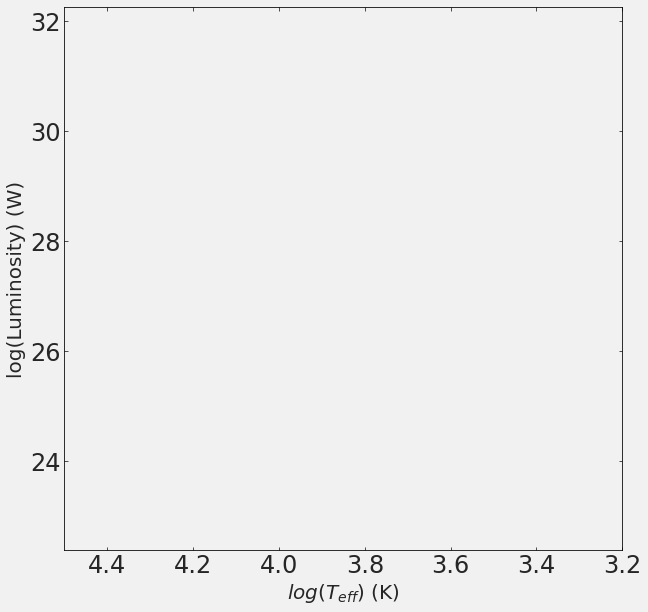

In [29]:
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
ax = pl.figure(figsize=(10,10)).add_subplot(111)

levels = np.linspace(H.max()/15, H.max(), 5)
i_min = np.argmin(levels)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

#quanto segue stampa  i punti fuori dal contorno.
#points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)


plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');

In [ ]:
extent = #
levels = np.linspace(...)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

#quanto segue crea e plotta i contorni

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='winter', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');

###Se voglio cambiare la **colormap** devo cabiare il parametro cmap in axc = contourf(...)